In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('HealthInsurance.csv')

In [3]:
data['region'].unique() #to check the different value of region 

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Replace the value of sex(male to 1, female to 0 ), smoker....

In [6]:
data['sex'].replace({'male':1,'female':0},inplace=True)

In [7]:
data['smoker'].replace({'yes':1,'no':0},inplace=True)

In [8]:
":4},inplace=True)

## Data Visualize

<function matplotlib.pyplot.show(close=None, block=None)>

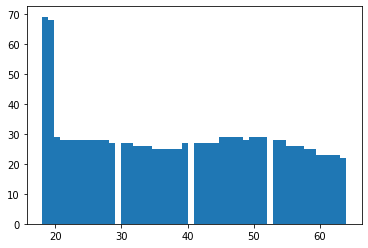

In [9]:
plt.hist(data['age'],bins=50)
plt.show

### after watching above plot we can say that data have taken mostly from teenage

<function matplotlib.pyplot.show(close=None, block=None)>

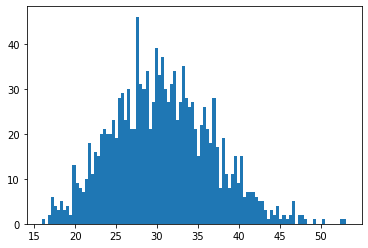

In [10]:
plt.hist(data['bmi'],bins=100)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

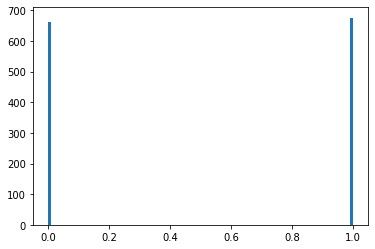

In [11]:
plt.hist(data['sex'],bins=100)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

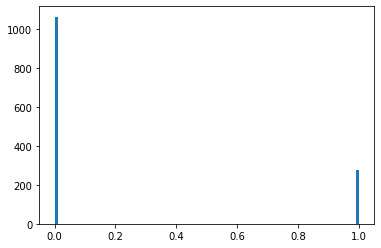

In [12]:
plt.hist(data['smoker'],bins=100)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

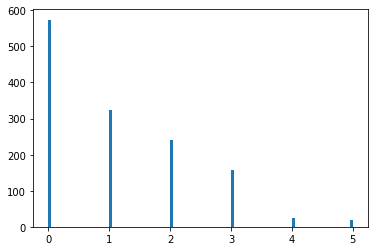

In [13]:
plt.hist(data['children'],bins=100)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

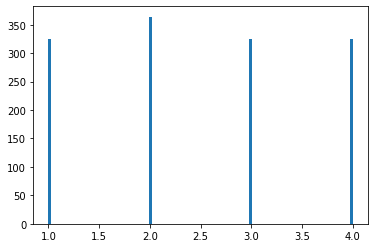

In [14]:
plt.hist(data['region'],bins=100)
plt.show

### after watching all the above plot all data taken from equally different region, sex
### most of the person have value of children =0 because data is taken mostly from teenage
### ground truth Nearly 30 per cent of the Indian population is aged 16 to 25 years

## correlate the data

In [15]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


## if we omit the value of region because it is almost relate to zero 


In [16]:
x = data[['age','sex','bmi','children','smoker']]
y = data[['charges']]

## Using train_test_split to split the data
## using 2 regression model 1) Linear and 2) random forest regression


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [18]:
model1 = LinearRegression()
forest1 = RandomForestRegressor()
model2=LinearRegression()
forest2 = RandomForestRegressor()

In [19]:
model1 = LinearRegression()
forest1 = RandomForestRegressor()
model2=LinearRegression()
forest2 = RandomForestRegressor()

In [20]:
mypoly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = mypoly.fit_transform(x)
np.ndim(x_poly)
mymodelp = LinearRegression()

In [24]:
model1 = LinearRegression()
forest1 = RandomForestRegressor()
model2=LinearRegression()
forest2 = RandomForestRegressor()

mypoly = PolynomialFeatures(degree=3, include_bias=False)
x_poly = mypoly.fit_transform(x)
np.ndim(x_poly)
mymodelp = LinearRegression()
mymodelp2 = LinearRegression()

In [25]:
mape = 1
while mape > 0.27:
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2) # split the data
    #LinearRegression() model use
    model1.fit(xtrain, ytrain)
    yhat1=model1.predict(xtest)
    mape1=mean_absolute_percentage_error(ytest,yhat1)
    
    #RandomForestRegressor() model use
    forest1.fit(xtrain, ytrain)
    yhatf1=forest1.predict(xtest)
    mapef1=mean_absolute_percentage_error(ytest,yhatf1)
    
    # PolynomialReression() model use
    mymodelp.fit(xtrain,ytrain)
    yhatp1=mymodelp.predict(xtest)
    mapep=mean_absolute_percentage_error(ytest,yhatp1)
    
    
    #after scaling
    myscaler=StandardScaler()
    xs=myscaler.fit_transform(x)
    xtrain2,xtest2,ytrain2,ytest2=train_test_split(xs,y,test_size=0.2)
    
    #LinearRegression() model use after scaling
    model2.fit(xtrain2, ytrain2)
    yhat2=model2.predict(xtest2)
    mape2=mean_absolute_percentage_error(ytest2,yhat2)
    
    #RandomForestRegressor() model use after scaling
    forest2.fit(xtrain2, ytrain2)
    yhatf2=forest2.predict(xtest2)
    mapef2=mean_absolute_percentage_error(ytest2,yhatf2)
    #mape get that value when mean absolute percentage error is less than 0.3
    mape=min(mape1,mapef1,mapep,mape2,mapef2)
    
# mape give the minumum value mean absolute percentage error from all 4 model
print(mape)
print(mape1,mapef1,mapep,mape2,mapef2)


C:\Users\saood\AppData\Local\Temp\ipykernel_12000\913844814.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest1.fit(xtrain, ytrain)
C:\Users\saood\AppData\Local\Temp\ipykernel_12000\913844814.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest2.fit(xtrain2, ytrain2)
C:\Users\saood\AppData\Local\Temp\ipykernel_12000\913844814.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest1.fit(xtrain, ytrain)
C:\Users\saood\AppData\Local\Temp\ipykernel_12000\913844814.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest2.fit(xtrain

C:\Users\saood\AppData\Local\Temp\ipykernel_12000\913844814.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest2.fit(xtrain2, ytrain2)
C:\Users\saood\AppData\Local\Temp\ipykernel_12000\913844814.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest1.fit(xtrain, ytrain)
C:\Users\saood\AppData\Local\Temp\ipykernel_12000\913844814.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest2.fit(xtrain2, ytrain2)
C:\Users\saood\AppData\Local\Temp\ipykernel_12000\913844814.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest1.fit(xtra

0.24049949519229835
0.42834214832424583 0.34163986619314884 0.42834214832424583 0.41843919861388956 0.24049949519229835


## Comapring Visualization 

0.42834214832424583 0.34163986619314884 0.42834214832424583 0.41843919861388956 0.24049949519229835


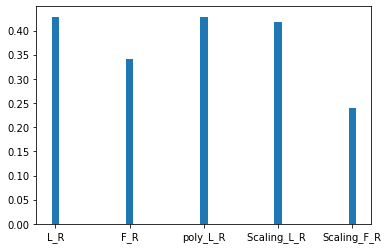

In [33]:
print(mape1,mapef1,mapep,mape2,mapef2)
x = np.array(["L_R", "F_R","poly_L_R", "Scaling_L_R ", "Scaling_F_R"])
y = (mape1,mapef1,mapep,mape2,mapef2)
plt.bar(x,y,width=0.1)
plt.show()

Text(0.5, 1.0, 'Insurance Prediction Price vs Real Price -- scaling & Random Regression')

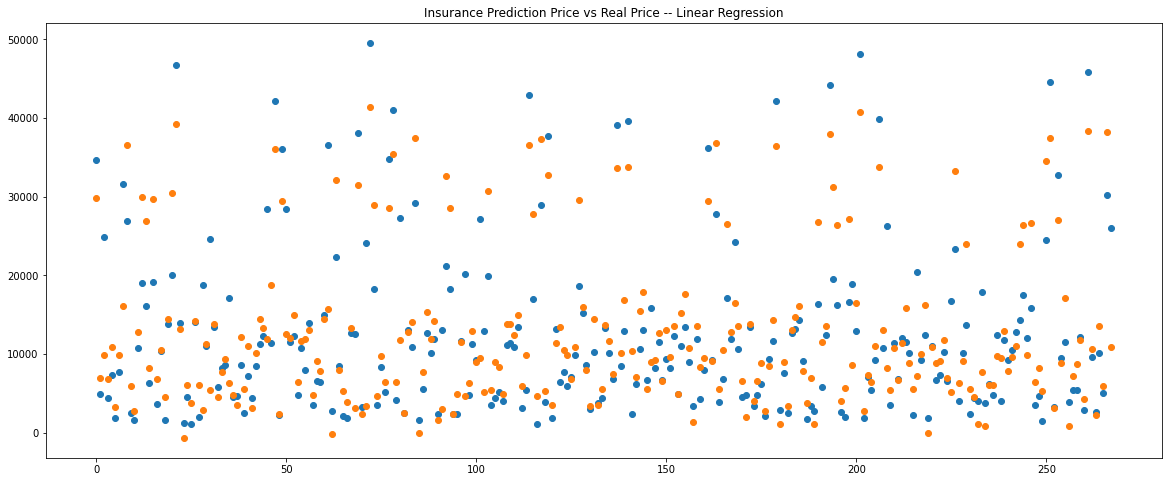

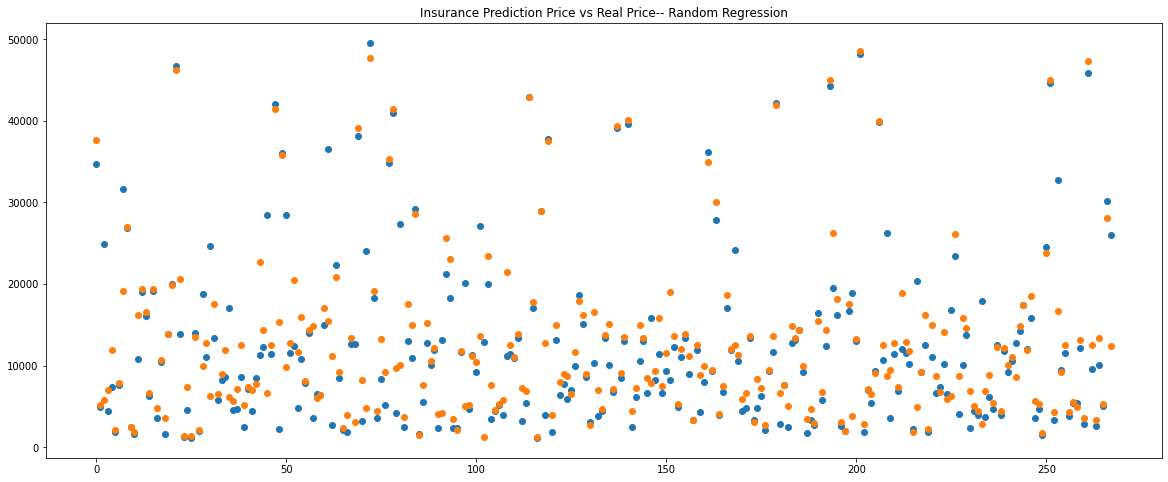

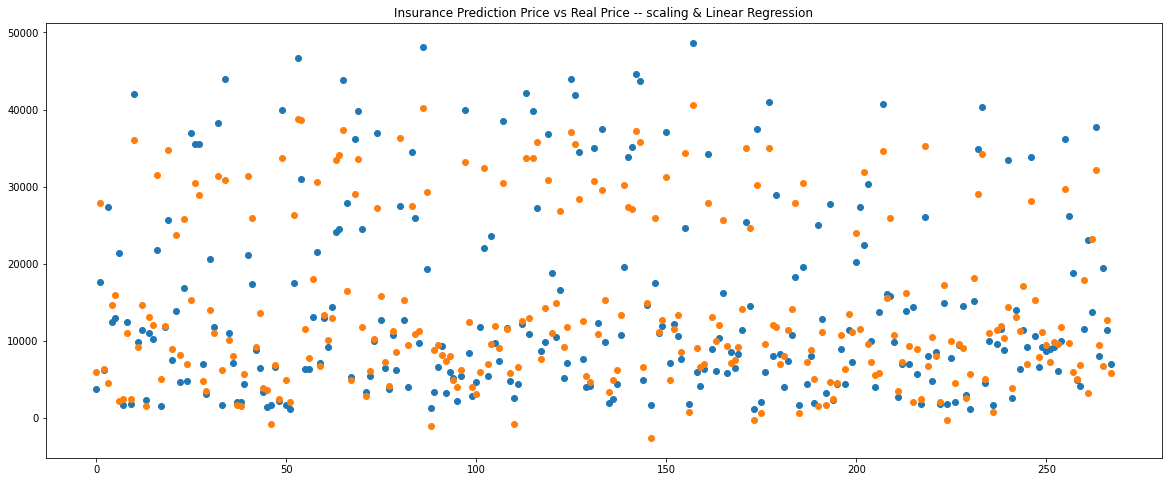

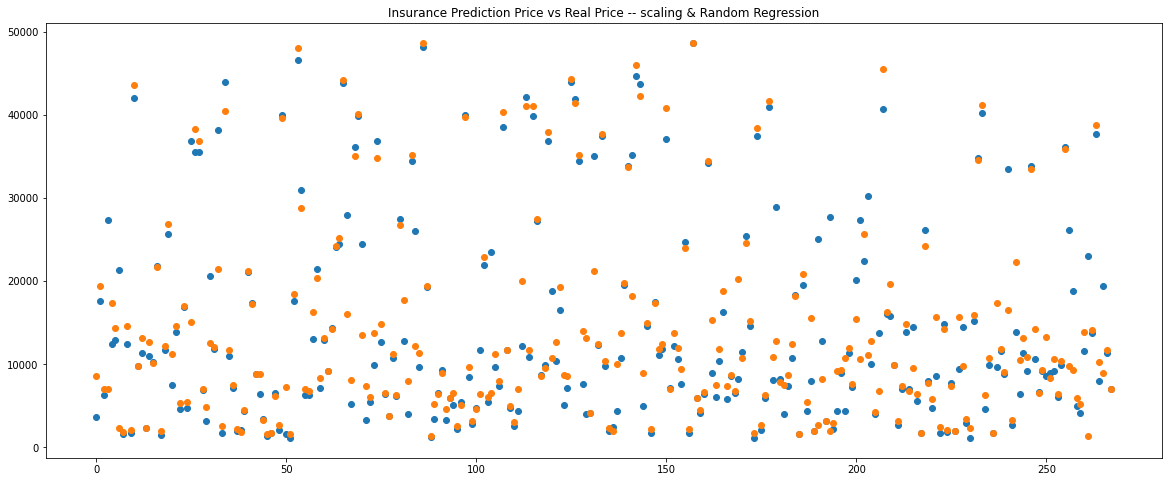

In [27]:
fig1=plt.figure(figsize=(20,8))
plt.scatter(np.arange(len(ytest)), ytest, label='Real')
plt.scatter(np.arange(len(ytest)), yhat1, label='Prediction')
plt.title('Insurance Prediction Price vs Real Price -- Linear Regression')


fig2=plt.figure(figsize=(20,8))
plt.scatter(np.arange(len(ytest)), ytest, label='Real')
plt.scatter(np.arange(len(ytest)), yhatf1, label='Prediction')
plt.title('Insurance Prediction Price vs Real Price-- Random Regression')

fig3=plt.figure(figsize=(20,8))
plt.scatter(np.arange(len(ytest)), ytest, label='Real')
plt.scatter(np.arange(len(ytest)), yhatp1, label='Prediction')
plt.title('Insurance Prediction Price vs Real Price-- Probabilty-Random Regression')

fig4=plt.figure(figsize=(20,8))
plt.scatter(np.arange(len(ytest2)), ytest2, label='Real')
plt.scatter(np.arange(len(ytest2)), yhat2, label='Prediction')
plt.title('Insurance Prediction Price vs Real Price -- scaling & Linear Regression')

fig5=plt.figure(figsize=(20,8))
plt.scatter(np.arange(len(ytest2)), ytest2, label='Real')
plt.scatter(np.arange(len(ytest2)), yhatf2, label='Prediction')
plt.title('Insurance Prediction Price vs Real Price -- scaling & Random Regression')



In [30]:
model=[model1,forest1,mymodelp,model2,forest2]
mae = [mape1,mapef1,mapep,mape2,mapef2]
## lr = Linear Regression
## fr = Forest Regression
## lrs = Linear Regression with scaling
## frs = Forest Regression with scaling
model_names = ['lr','fr','lrp','lrs','frs']


In [31]:
import joblib

## atomatic joblib file maker

In [32]:
## by using the below command we can save the joblib atomatically which has minmum value of  mean absolute percentage error
model_number = mae.index(min(mae))
final_model = model[model_number]
print(model_names[model_number])
## if scale models had not minimum mean absolute percentage error value of than in joblib file name as not end with 's'
## if scale models had  minimum mean absolute percentage error value of than in joblib file name end with 's'

if model_number < 3:
    joblib.dump([model[model_number]],model_names[model_number]+'1.joblib')
else:
    joblib.dump([model[model_number],myscaler],model_names[model_number]+'1.joblib')

frs


## after observing many times the data has many outliers and also data is not sufficient that's why we could not get less mean absolute percentage error
